In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

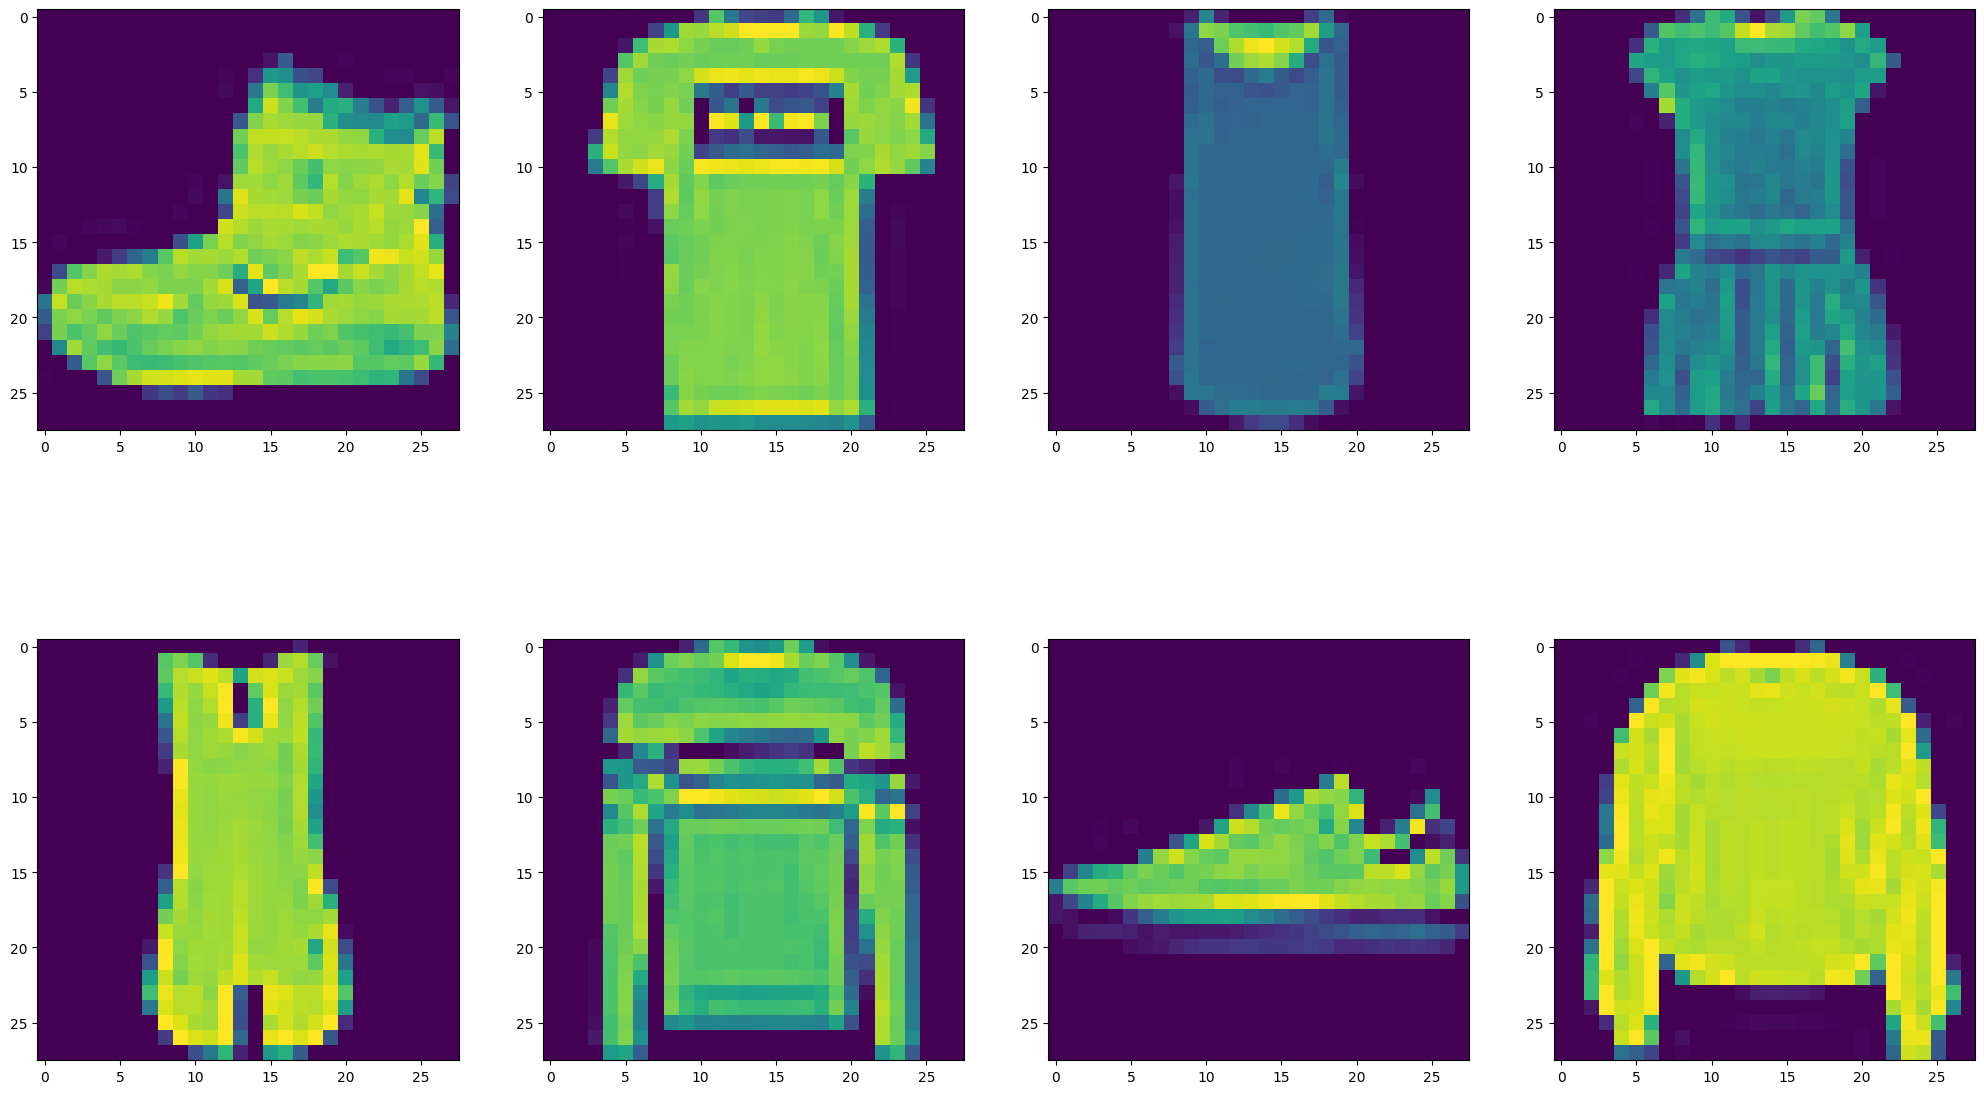

In [3]:
fig, axs = plt.subplots(2, 4, figsize=(25, 15))

axs = axs.ravel()

for i, image in enumerate(x_train[:8]):
    axs[i].imshow(image)

plt.show()

In [4]:
input_shape = (28, 28, 1)

# x_train = x_train.astype("float32") / 255
# x_test = x_test.astype("float32") / 255
# y_train = y_train.astype("float32") / 255
# y_test = y_test.astype("float32") / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,802 (132.04 KB)

 Trainable params: 33,802 (132.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
batch_size = 128
epochs = 40

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

train_history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5575 - loss: 4.4856 - val_accuracy: 0.7539 - val_loss: 0.7210
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7831 - loss: 0.6291 - val_accuracy: 0.7946 - val_loss: 0.5908
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8065 - loss: 0.5444 - val_accuracy: 0.8116 - val_loss: 0.5503
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8212 - loss: 0.4973 - val_accuracy: 0.8144 - val_loss: 0.5272
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8314 - loss: 0.4762 - val_accuracy: 0.8302 - val_loss: 0.4931
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8422 - loss: 0.4404 - val_accuracy: 0.8257 - val_loss: 0.5101
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8460 - loss: 0.4337 - val_accuracy: 0.8323 - val_loss: 0.4960
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8508 - loss: 0.4105 - val_accuracy: 0.

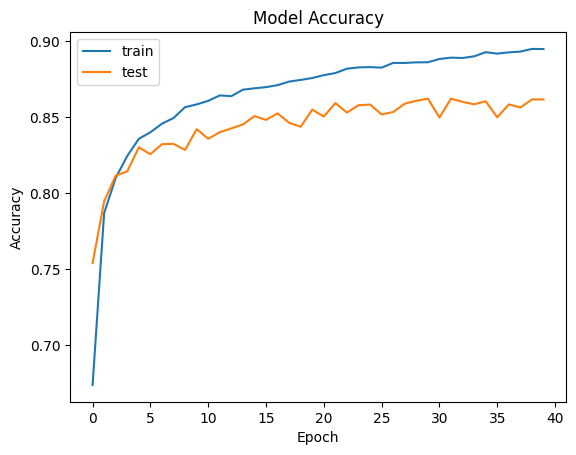

In [10]:
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc='upper left')
plt.show()

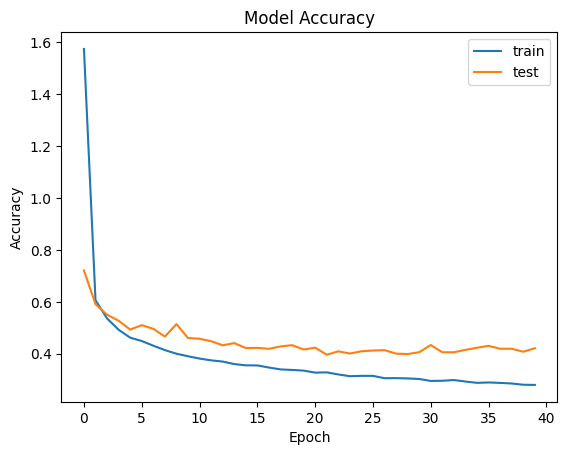

In [11]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc='upper right')
plt.show()